In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/__script__.py
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/imbalanced_learn-0.10.1-py3-none-any.whl
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/__results__.html
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/joblib-1.5.2-py3-none-any.whl
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/input_requirements.txt
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/threadpoolctl-3.6.0-py3-none-any.whl
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/__script__.ipynb
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/__output__.json
/kaggle/input/pm-97933637-at-11-04-2025-07-04-19/numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl

## Credit Card Fraud Detection using Machine Learning (Scikit-learn & XGBoost)

**This project focuses on detecting fraudulent credit card transactions using various Machine Learning algorithms. It includes data preprocessing, EDA, SMOTE balancing, model training, and hyperparameter tuning with Scikit-learn and XGBoost. The main goal is to build a model that accurately identifies fraud while minimizing false alerts.**

## Load Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


**Check shape and info**

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Cleaning

**Check missing values**

In [6]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**There are no missing values**

**Check duplicate rows**

In [7]:
dataset.duplicated().sum()

1081

**Drop duplicates**

In [8]:
dataset = dataset.drop_duplicates(keep="first")
dataset.duplicated().sum()

0

In [9]:
dataset.shape

(283726, 31)

**Result:**

**Duplicates removed successfully (from 1081 → 0). No missing values found.**

**Class Distribution**

In [10]:
classes = dataset["Class"].value_counts()
print(classes)

Class
0    283253
1       473
Name: count, dtype: int64


In [11]:
normal = round(classes[0]/dataset["Class"].count()*100,2)
fraud = round(classes[1]/dataset["Class"].count()*100,2)

print("The percentage of normal_share :", normal)
print("The percentage of fraud_share :", fraud)

The percentage of normal_share : 99.83
The percentage of fraud_share : 0.17


**Result:**

* Non-Fraud: 99.83%

* Fraud: 0.17% (Highly imbalanced dataset)

## Visualizing Fraud vs Non-Fraud

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
fraud = {"Class":["Non_fraud","fraud"],"Percentage":[normal,fraud]}
fraud_data =pd.DataFrame(fraud)

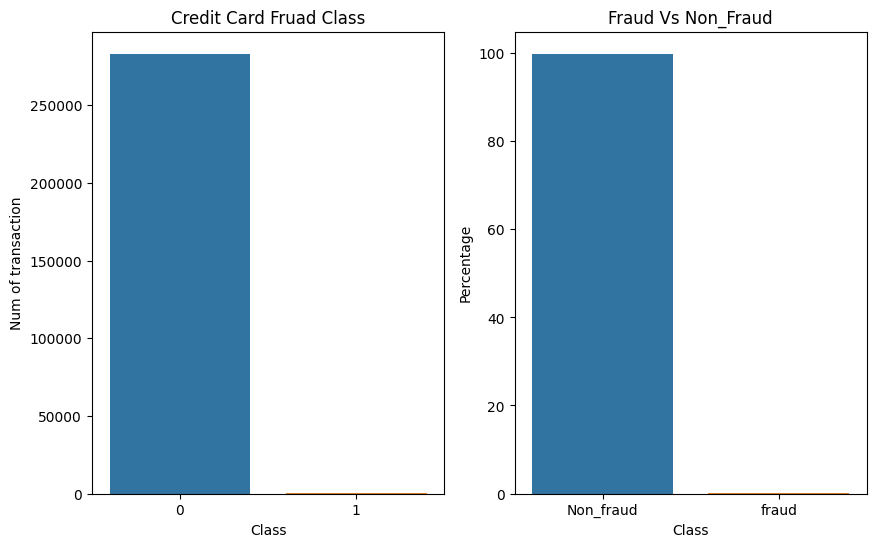

In [14]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(x = "Class", data=dataset)
plt.title("Credit Card Fruad Class")
plt.xlabel("Class")
plt.ylabel("Num of transaction")


plt.subplot(1,2,2)
sns.barplot(x = "Class",y = "Percentage", data = fraud_data)
plt.title("Fraud Vs Non_Fraud")
plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

## Transaction Time Distribution

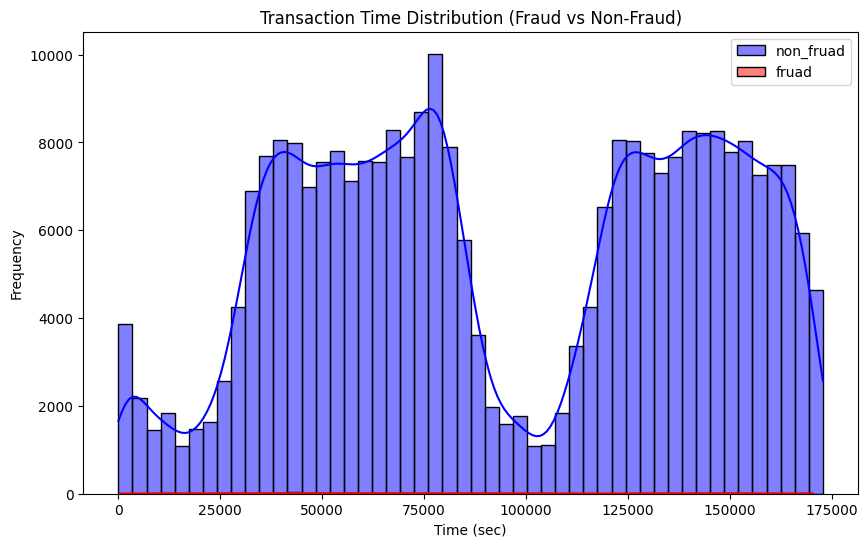

In [16]:
plt.figure(figsize=(10,6))

sns.histplot(dataset[dataset["Class"] == 0]["Time"],bins=50,color = "blue",kde = True, label = "non_fruad")
sns.histplot(dataset[dataset["Class"] == 1]["Time"],bins=50,color = "red",kde = True, label = "fruad")
plt.title('Transaction Time Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Correlation Heatmap**

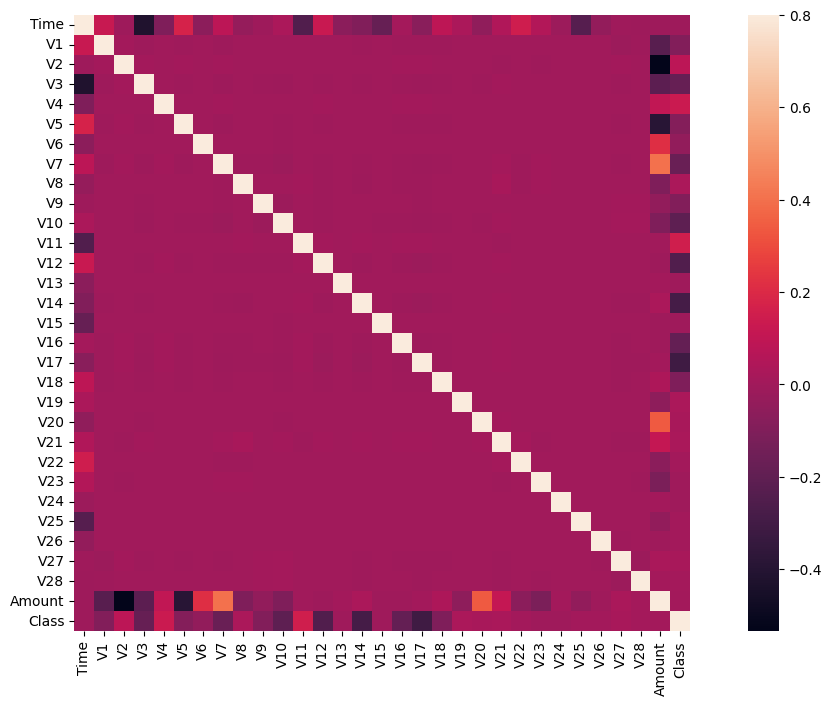

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),vmax = .8, square = True)
plt.show()

**Statistical Summary**

In [18]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Model Training & Evaluation

**Split dataset into features (x) and target (y)**

In [19]:
x = dataset.iloc[:,:-1]
y = dataset["Class"]

**Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

**Handling Class Imbalance with SMOTE**

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train,y_train)

In [22]:
from collections import Counter

print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0: 212439, 1: 355})
After resampling: Counter({0: 212439, 1: 212439})


**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_resampled[["Time","Amount"]] = sc.fit_transform(x_resampled[["Time","Amount"]])
x_test[["Time","Amount"]] = sc.transform(x_test[["Time","Amount"]])

## Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(x_resampled, y_resampled)
y_pred_lr = lr.predict(x_test)
y_probs_lr = lr.predict_proba(x_test)[:, 1]

**Model Performance Metrics**

In [25]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
import numpy as np

In [26]:
precision_score = precision_score(y_test,y_pred_lr)
recall_score = recall_score(y_test,y_pred_lr)
f1_score = f1_score(y_test,y_pred_lr)
roc_auc_score = roc_auc_score(y_test,y_probs_lr)

In [27]:
print("Precision Score :",round(precision_score,3))
print("Recall Score :",round(recall_score,3))
print("F1 Score :",round(f1_score,3))
print("Roc Auc Score :",round(roc_auc_score,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Precision Score : 0.149
Recall Score : 0.873
F1 Score : 0.254
Roc Auc Score : 0.969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.15      0.87      0.25       118

    accuracy                           0.99     70932
   macro avg       0.57      0.93      0.62     70932
weighted avg       1.00      0.99      0.99     70932



**Interpretation:**

High Recall (0.87) → model successfully catches most fraud cases.

Low Precision (0.15) → some false alarms (normal predicted as fraud).

High ROC-AUC (0.97) → model separates classes very well overall.

**Confusion Matrix Visualization**

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[70224   590]
 [   15   103]]


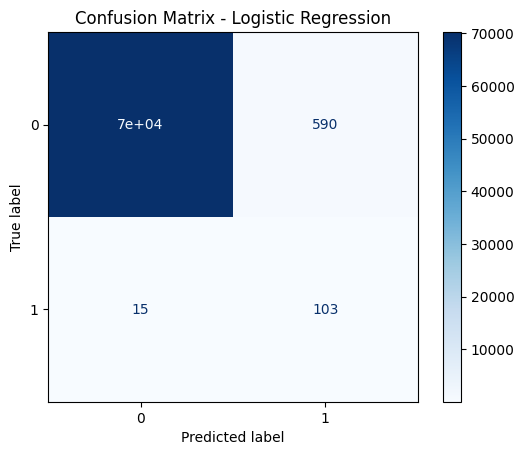

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## KNN Classifier Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_resampled, y_resampled)
y_pred_knc = knc.predict(x_test)
y_probs_knc = knc.predict_proba(x_test)[:, 1]

**Model Evaluation Metrics**

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_knc = precision_score(y_test,y_pred_knc)
recall_knc = recall_score(y_test,y_pred_knc)
f1_knc = f1_score(y_test,y_pred_knc)
roc_auc_knc = roc_auc_score(y_test,y_probs_knc)

In [32]:
print("Precision Score :",round(precision_knc,3))
print("Recall Score :",round(recall_knc,3))
print("F1 Score :",round(f1_knc,3))
print("Roc Auc Score :",round(roc_auc_knc,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knc))

Precision Score : 0.606
Recall Score : 0.822
F1 Score : 0.698
Roc Auc Score : 0.911

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.61      0.82      0.70       118

    accuracy                           1.00     70932
   macro avg       0.80      0.91      0.85     70932
weighted avg       1.00      1.00      1.00     70932



* Interpretation:

* Precision (0.61) → much improved; fewer false positives compared to Logistic Regression (0.15).

* Recall (0.82) → still strong; detects most fraud cases.

* F1-score (0.70) → strong balance between precision and recall.

* ROC-AUC (0.91) → good class separation ability.

**Confusion Matrix Visualization**

In [33]:
cm_knc = confusion_matrix(y_test, y_pred_knc)
print("Confusion Matrix:\n", cm_knc)

Confusion Matrix:
 [[70751    63]
 [   21    97]]


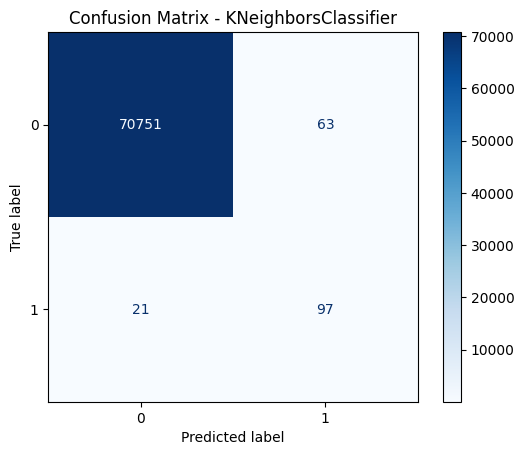

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knc, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNeighborsClassifier")
plt.show()

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

"""
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state = 42)

param = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

grid_rfc = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param,
    n_iter=20,               
    scoring='f1',           
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

grid_rfc.fit(x_resampled, y_resampled)

print("✅ Best Parameters:", grid_rfc.best_params_)
print("✅ Best F1 Score:", grid_rfc.best_score_)
best_rfc = grid_rfc.best_estimator

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced'}

"""

'\nfrom sklearn.model_selection import RandomizedSearchCV\nrfc = RandomForestClassifier(random_state = 42)\n\nparam = {\n    \'n_estimators\': [100, 200, 300, 400],\n    \'max_depth\': [10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\'],\n    \'class_weight\': [\'balanced\']\n}\n\ngrid_rfc = RandomizedSearchCV(\n    estimator=rfc,\n    param_distributions=param,\n    n_iter=20,               \n    scoring=\'f1\',           \n    cv=3,\n    n_jobs=-1,\n    verbose=2,\n    random_state=42\n)\n\ngrid_rfc.fit(x_resampled, y_resampled)\n\nprint("✅ Best Parameters:", grid_rfc.best_params_)\nprint("✅ Best F1 Score:", grid_rfc.best_score_)\nbest_rfc = grid_rfc.best_estimator\n\nBest Parameters: {\'n_estimators\': 300, \'min_samples_split\': 2, \'min_samples_leaf\': 1, \'max_features\': \'log2\', \'max_depth\': 30, \'class_weight\': \'balanced\'}\n\n'

In [36]:
rfc = RandomForestClassifier(random_state = 42,n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features="log2",max_depth=30,class_weight='balanced')
rfc.fit(x_resampled, y_resampled)
y_pred_rfc = rfc.predict(x_test)
y_probs_rfc = rfc.predict_proba(x_test)[:, 1]

**Model Evaluation Metrics**

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_rfc = precision_score(y_test,y_pred_rfc)
recall_rfc = recall_score(y_test,y_pred_rfc)
f1_rfc = f1_score(y_test,y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test,y_probs_rfc)

In [38]:
print("Precision Score :",round(precision_rfc,3))
print("Recall Score :",round(recall_rfc,3))
print("F1 Score :",round(f1_rfc,3))
print("Roc Auc Score :",round(roc_auc_rfc,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfc))

Precision Score : 0.876
Recall Score : 0.78
F1 Score : 0.825
Roc Auc Score : 0.976

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.78      0.83       118

    accuracy                           1.00     70932
   macro avg       0.94      0.89      0.91     70932
weighted avg       1.00      1.00      1.00     70932



**Interpretation:**

* Precision (0.88) → far fewer false alarms than previous models.

* Recall (0.78) → still detects most fraudulent transactions.

* F1 Score (0.83) → strong balance between catching frauds and avoiding misclassification.

* ROC-AUC (0.976) → excellent model discrimination ability.

**Confusion Matrix Visualization**

In [39]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", cm_rfc)

Confusion Matrix:
 [[70801    13]
 [   26    92]]


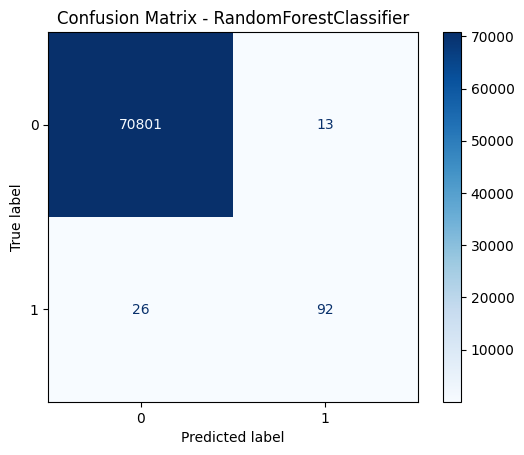

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

## XGBoost Classifier Model

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier(random_state = 42)

param_xgb = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

random_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_xgb,
    n_iter=10,             
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_xgb.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [42]:
print("Best Parameters:", random_xgb.best_params_)
print("Best F1 Score:", random_xgb.best_score_)
best_xgb = random_xgb.best_estimator_

Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best F1 Score: 0.9998493906240004


In [43]:
xgb = XGBClassifier(subsample = 0.8, n_estimators = 400, min_child_weight = 1, max_depth = 10, learning_rate = 0.05, gamma = 0.1, colsample_bytree = 0.6)
xgb.fit(x_resampled, y_resampled)
y_pred_xgb = xgb.predict(x_test)
y_probs_xgb = xgb.predict_proba(x_test)[:, 1]

**Model Evaluation**

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test,y_probs_xgb)

In [45]:
print("Precision Score :",round(precision_xgb,3))
print("Recall Score :",round(recall_xgb,3))
print("F1 Score :",round(f1_xgb,3))
print("Roc Auc Score :",round(roc_auc_xgb,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Precision Score : 0.855
Recall Score : 0.797
F1 Score : 0.825
Roc Auc Score : 0.978

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.85      0.80      0.82       118

    accuracy                           1.00     70932
   macro avg       0.93      0.90      0.91     70932
weighted avg       1.00      1.00      1.00     70932



**Interpretation:**

* Precision (0.86) → highly reliable fraud predictions (few false positives).

* Recall (0.80) → strong ability to catch most fraudulent transactions.

* F1 (0.83) → balanced performance.

* ROC-AUC (0.978) → best discrimination between fraud and non-fraud classes so far.



**Confusion Matrix Visualization**

In [46]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

Confusion Matrix:
 [[70798    16]
 [   24    94]]


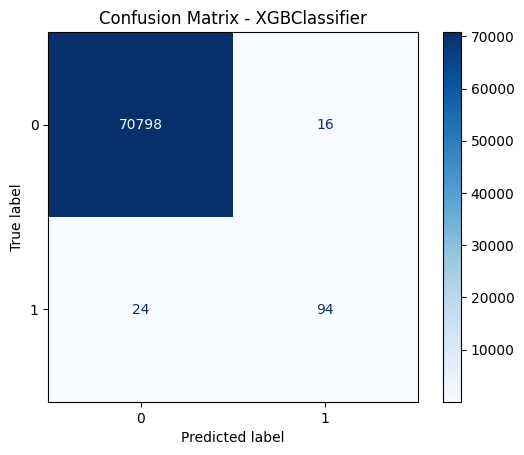

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

**Result Summary**

Among all the tested models, the tuned **XGBoost Classifier** performed **the best**. It achieved a **Precision of 0.855, Recall of 0.797, F1-Score of 0.825, and an impressive ROC-AUC Score of 0.978**.

This indicates that the model effectively detects fraudulent activities with high accuracy and balanced performance between precision and recall.

Hence, **XGBoost** is chosen as the **final and best-performing model for credit card fraud detection.**